# Week 3 Classification

**Reference: Chapter 3**

In last week we explored a regression task using primarily our own observation of the data. This week let's look at a classification task, and see how existing machine learning techniques can be applied to solve it.

## Classifying Points on the Plane

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data set

In [ ]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
# Open the url in web brower and learn its raw format

# Load to Python as a data frame
raw_data = 

# Display first 5 rows


### 2. Data Exploration

In [ ]:
# Show the size of the data set


In [ ]:
# Show the data type of each column


In [ ]:
# Is there any missing values?
pd.isnull(raw_data).sum()

In [ ]:
# DataFrame.info() is helpful
raw_data.info()

In [ ]:
# x1, x2 are numeric values. What is the distribution of values?
numeric_cols = ['x1', 'x2']
raw_data[numeric_cols].describe()

In [ ]:
# plot the distribution as histograms
raw_data[numeric_cols].hist()

In [ ]:
# Plot data as points on a 2D plane
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r.', label='y = 1')
plt.title('Visualization of Data Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.savefig('Week3Fig.png')

### 3. Build a Classification Model
The `sklearn` package provides implementations of many existing machine elarning techniques. Today we are going to apply **support vector machine (SVM)** and **k-nearest-neighbors** method to build two different classification models.

### Attempt 1: Linear SVM

![Illustration of SVM](https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/introduction-to-SVM.png)

In [ ]:
# SVM model
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(raw_data[['x1', 'x2']], raw_data['y'])

In [ ]:
# Predict the class of point(-2, 2) and (3, -1)
test_data = pd.DataFrame({
    'x1': [-2, 3],
    'x2': [2, -1]
})
test_data

In [ ]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

In [ ]:
# Visualize the decision region
test_data_full = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100)
x2_coordinates = np.linspace(-2, 3, 100)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        test_data_full = test_data_full.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
test_data_full

In [ ]:
test_data_full.shape

In [ ]:
test_data_full['prediction'] = model_svm.predict(test_data_full[['x1', 'x2']])
test_data_full.head()

In [ ]:
test_data_blue = test_data_full[test_data_full['prediction'] == 0]
test_data_red = test_data_full[test_data_full['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

**Discussion:** How to evaluate this model?

In [ ]:
# Calculate the training error rate


### Attempt 2:  3-Nearest-Neighbor
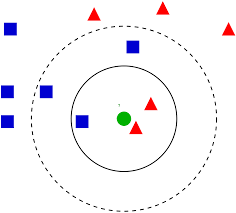

In [ ]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

In [ ]:
# We defined test_data before
test_data

In [ ]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

In [ ]:
# Find model prediction on each point in test_data_full


In [ ]:
# Plot the decision regions


# Week 3 Homework (Due on Monday, Feb. 17 at 11:59PM)
Build kNN model with k = 1, 15, 50. Display the decision regions and training error rate for each model.